<a href="https://colab.research.google.com/github/vnylp/JupyterNotebookCodes/blob/master/CustomerAnalaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import excel with name Dataset.xlsx

import pandas as pd

# Assuming 'Dataset.xlsx' is in the current working directory.
# If not, provide the full path to the file.
try:
    df = pd.read_excel('Dataset.xlsx')
    print(df.head())  # Print the first few rows to verify import
except FileNotFoundError:
    print("Error: 'Dataset.xlsx' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

  Customer_ID Subscription_Plan  Monthly_Revenue  Churned  Lifetime_Value
0      CUST_1           Premium           170.64    False         4798.05
1      CUST_2          Standard           363.77    False         1629.87
2      CUST_3             Basic           393.55    False         4548.00
3      CUST_4          Standard           393.94    False         1239.82
4      CUST_5             Basic           213.69    False         3060.88


In [2]:
df

,Customer_ID,Subscription_Plan,Monthly_Revenue,Churned,Lifetime_Value
0,CUST_1,Premium,170.64,False,4798.05
1,CUST_2,Standard,363.77,False,1629.87
2,CUST_3,Basic,393.55,False,4548.00
3,CUST_4,Standard,393.94,False,1239.82
4,CUST_5,Basic,213.69,False,3060.88
...,...,...,...,...,...
95,CUST_96,Premium,153.14,False,4942.96
96,CUST_97,Premium,108.42,True,953.90
97,CUST_98,Basic,388.49,True,4825.60
98,CUST_99,Basic,481.09,True,2334.74


 calculate Monthly Recurring Revenue (MRR)

In [5]:
df.columns

Index(['Customer_ID', 'Subscription_Plan', 'Monthly_Revenue', 'Churned',
       'Lifetime_Value'],
      dtype='object')

In [7]:
df[df['Churned'] == False]['Monthly_Revenue'].sum()

12288.33

In [11]:
chrunnumbers=df['Churned'].value_counts().reset_index()

In [16]:
chrunrate = chrunnumbers[chrunnumbers['Churned']==True]['count'][1]/df.shape[0]

0.5

Entire project for reference

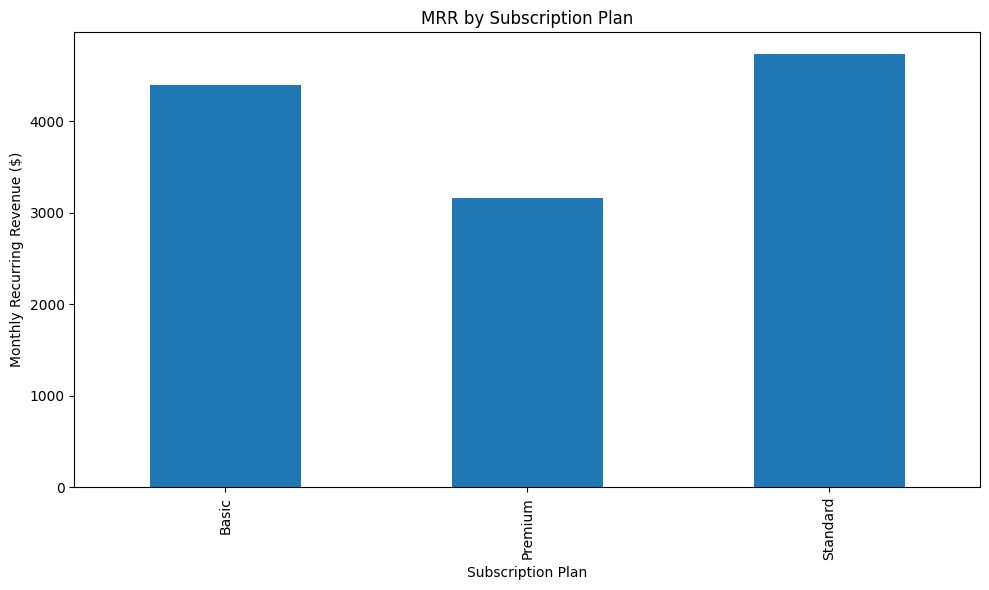

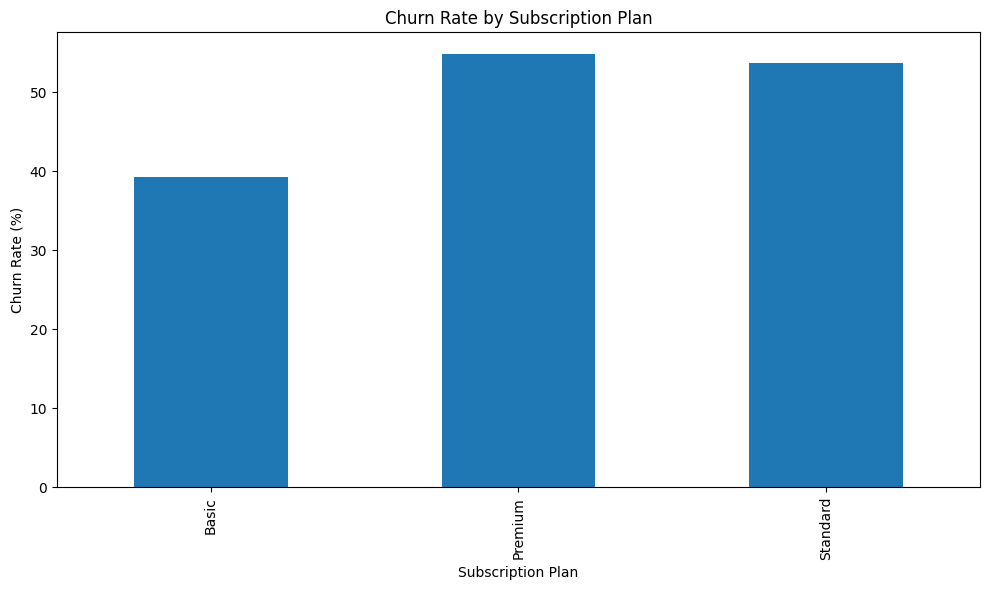

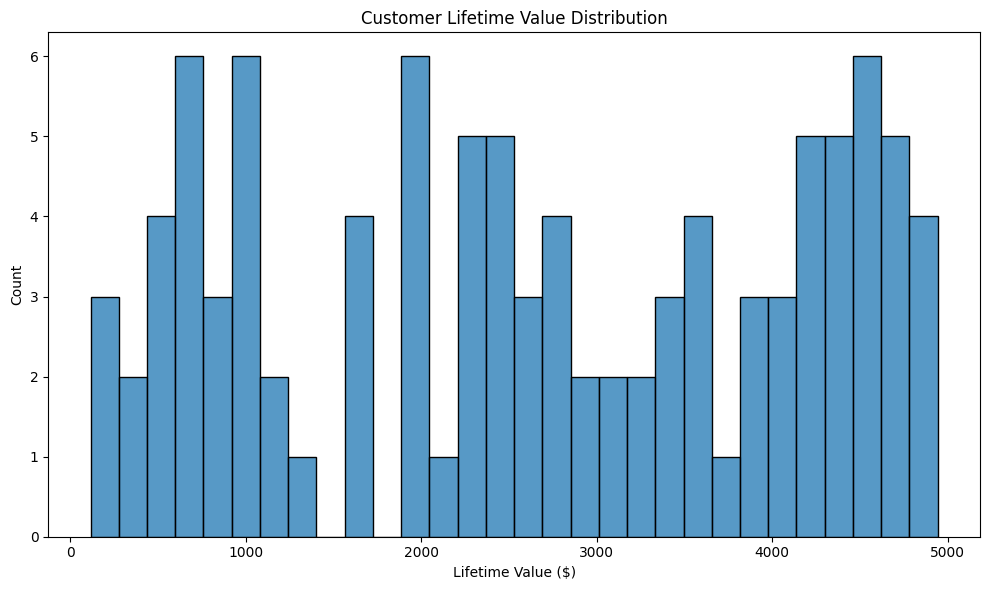

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

class SaaSAnalytics:
    def __init__(self, data_path):
        self.df = pd.read_excel(data_path)
        self.mrr = 0
        self.churn_rate = 0
        self.clv = 0

    def calculate_mrr(self):
        """Calculate Monthly Recurring Revenue"""
        self.mrr = self.df[~self.df['Churned']]['Monthly_Revenue'].sum()
        self.mrr_by_plan = self.df[~self.df['Churned']].groupby('Subscription_Plan')['Monthly_Revenue'].sum()
        return self.mrr, self.mrr_by_plan

    def calculate_churn_rate(self):
        """Calculate Churn Rate"""
        total_customers = len(self.df)
        churned_customers = len(self.df[self.df['Churned']])
        self.churn_rate = (churned_customers / total_customers) * 100
        return self.churn_rate

    def calculate_clv(self):
        """Calculate Customer Lifetime Value"""
        avg_monthly_revenue = self.df['Monthly_Revenue'].mean()
        avg_lifetime = self.df['Lifetime_Value'].mean() / avg_monthly_revenue
        self.clv = avg_monthly_revenue * avg_lifetime
        return self.clv

    def segment_analysis(self):
        """Analyze customer segments"""
        segment_metrics = self.df.groupby('Subscription_Plan').agg({
            'Monthly_Revenue': 'mean',
            'Churned': 'mean',
            'Lifetime_Value': 'mean'
        }).round(2)
        return segment_metrics

    def identify_upsell_opportunities(self):
        """Identify customers ready for upsell"""
        high_value_customers = self.df[
            (self.df['Lifetime_Value'] > self.df['Lifetime_Value'].mean()) &
            (~self.df['Churned']) &
            (self.df['Subscription_Plan'] != 'Premium')
        ]
        return high_value_customers

    def identify_at_risk(self):
        """Identify at-risk customers"""
        avg_lifetime = self.df['Lifetime_Value'].mean()
        at_risk = self.df[
            (self.df['Lifetime_Value'] < avg_lifetime * 0.5) &
            (~self.df['Churned'])
        ]
        return at_risk

    def generate_visualizations(self):
        """Generate key visualizations"""
        # MRR by Plan
        plt.figure(figsize=(10, 6))
        self.mrr_by_plan.plot(kind='bar')
        plt.title('MRR by Subscription Plan')
        plt.xlabel('Subscription Plan')
        plt.ylabel('Monthly Recurring Revenue ($)')
        plt.tight_layout()
        plt.savefig('mrr_by_plan.png')

        # Churn by Plan
        plt.figure(figsize=(10, 6))
        churn_by_plan = self.df.groupby('Subscription_Plan')['Churned'].mean() * 100
        churn_by_plan.plot(kind='bar')
        plt.title('Churn Rate by Subscription Plan')
        plt.xlabel('Subscription Plan')
        plt.ylabel('Churn Rate (%)')
        plt.tight_layout()
        plt.savefig('churn_by_plan.png')

        # CLV Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Lifetime_Value', bins=30)
        plt.title('Customer Lifetime Value Distribution')
        plt.xlabel('Lifetime Value ($)')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig('clv_distribution.png')

def main():
    # Initialize analytics
    analytics = SaaSAnalytics('/content/Dataset.xlsx')

    # Calculate key metrics
    mrr, mrr_by_plan = analytics.calculate_mrr()
    churn_rate = analytics.calculate_churn_rate()
    clv = analytics.calculate_clv()

    # Generate insights
    segment_analysis = analytics.segment_analysis()
    upsell_opportunities = analytics.identify_upsell_opportunities()
    at_risk_customers = analytics.identify_at_risk()

    # Generate visualizations
    analytics.generate_visualizations()

    # Print report
    print("\nSaaS Revenue Analysis Report")
    print("===========================")
    print(f"\nTotal MRR: ${mrr:,.2f}")
    print(f"Overall Churn Rate: {churn_rate:.1f}%")
    print(f"Average Customer Lifetime Value: ${clv:,.2f}")

    print("\nSegment Analysis:")
    print(segment_analysis)

    print(f"\nNumber of Upsell Opportunities: {len(upsell_opportunities)}")
    print(f"Number of At-Risk Customers: {len(at_risk_customers)}")

if __name__ == "__main__":
    main()